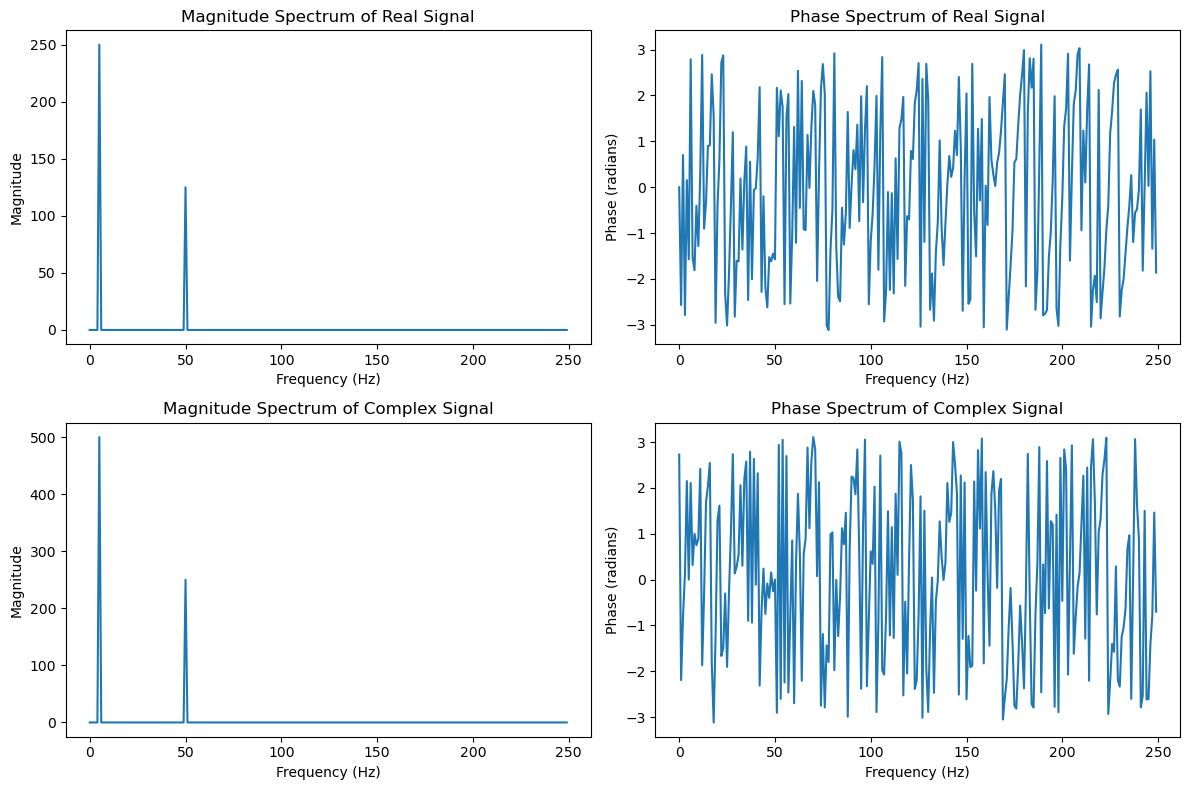

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 时间向量
t = np.linspace(0, 1, 500, endpoint=False)

# 生成一个实数信号 (两个频率的正弦波)
f1, f2 = 5, 50
real_signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

# 生成一个复数信号（带有相位信息的信号）
complex_signal = np.exp(1j * 2 * np.pi * f1 * t) + 0.5 * np.exp(1j * 2 * np.pi * f2 * t)

# 对实数信号进行傅里叶变换
fft_real = np.fft.fft(real_signal)

# 对复数信号进行傅里叶变换
fft_complex = np.fft.fft(complex_signal)

# 计算频率
freqs = np.fft.fftfreq(len(t), d=t[1] - t[0])

# 只显示正频率部分
positive_freqs = freqs[freqs >= 0]
fft_real_pos = fft_real[freqs >= 0]
fft_complex_pos = fft_complex[freqs >= 0]

# 幅度谱
real_magnitude = np.abs(fft_real_pos)
complex_magnitude = np.abs(fft_complex_pos)

# 相位谱
real_phase = np.angle(fft_real_pos)
complex_phase = np.angle(fft_complex_pos)

# 绘制幅度谱和相位谱
plt.figure(figsize=(12, 8))

# 实数信号的幅度谱
plt.subplot(2, 2, 1)
plt.plot(positive_freqs, real_magnitude)
plt.title('Magnitude Spectrum of Real Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# 实数信号的相位谱
plt.subplot(2, 2, 2)
plt.plot(positive_freqs, real_phase)
plt.title('Phase Spectrum of Real Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# 复数信号的幅度谱
plt.subplot(2, 2, 3)
plt.plot(positive_freqs, complex_magnitude)
plt.title('Magnitude Spectrum of Complex Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# 复数信号的相位谱
plt.subplot(2, 2, 4)
plt.plot(positive_freqs, complex_phase)
plt.title('Phase Spectrum of Complex Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


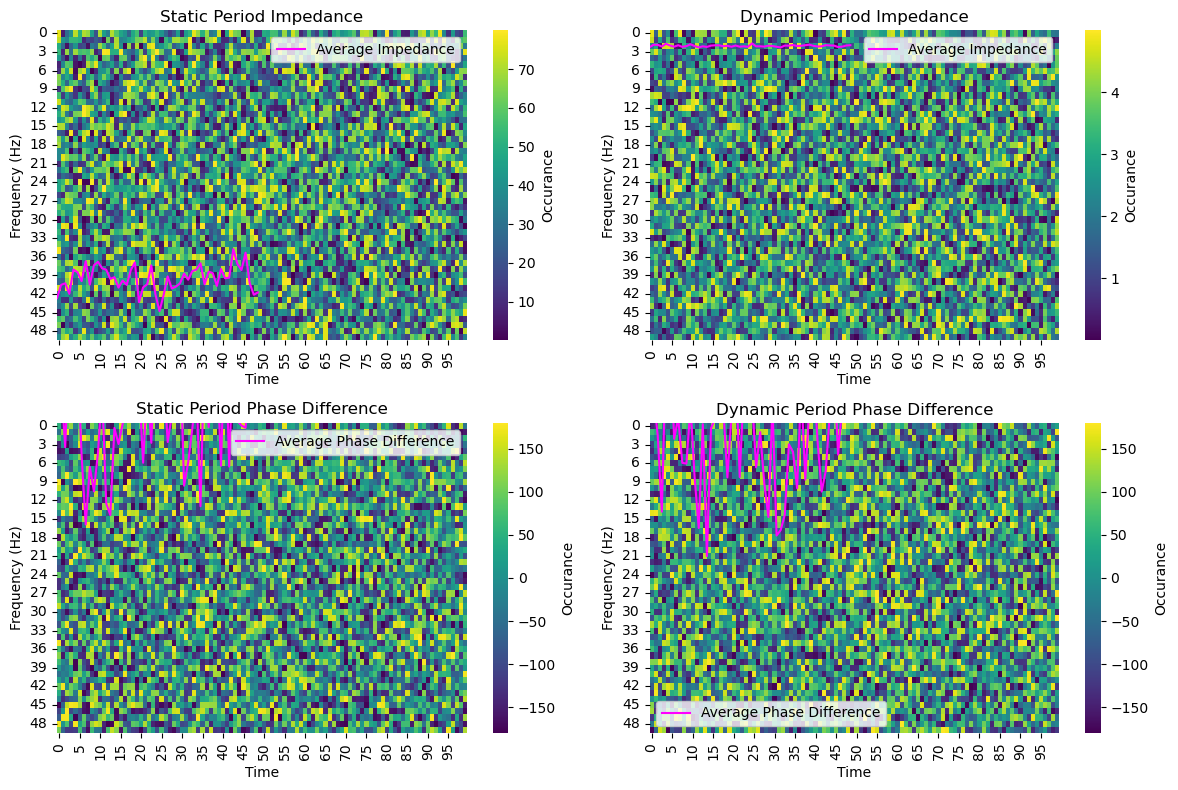

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 模拟一些数据
frequencies = np.linspace(0, 8, 50)  # 频率范围
time_period = np.linspace(0, 1, 100)  # 模拟时间
Z_static = np.random.rand(100, 50) * 80  # 随机生成静态阻抗数据
Z_dynamic = np.random.rand(100, 50) * 5  # 随机生成动态阻抗数据
phase_static = np.random.rand(100, 50) * 360 - 180  # 随机生成静态相位差
phase_dynamic = np.random.rand(100, 50) * 360 - 180  # 随机生成动态相位差

# 计算每个频率的平均值
Z_static_mean = Z_static.mean(axis=0)
Z_dynamic_mean = Z_dynamic.mean(axis=0)
phase_static_mean = phase_static.mean(axis=0)
phase_dynamic_mean = phase_dynamic.mean(axis=0)

# 创建一个2x2的子图
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 图 (a): 静态阻抗
sns.heatmap(Z_static.T, ax=axes[0, 0], cmap="viridis", cbar_kws={'label': 'Occurance'})
axes[0, 0].plot(Z_static_mean,,
axes[0, 0].set_title('Static Period Impedance')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Frequency (Hz)')
axes[0, 0].legend()

# 图 (b): 动态阻抗
sns.heatmap(Z_dynamic.T, ax=axes[0, 1], cmap="viridis", cbar_kws={'label': 'Occurance'})
axes[0, 1].plot(Z_dynamic_mean,,
axes[0, 1].set_title('Dynamic Period Impedance')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Frequency (Hz)')
axes[0, 1].legend()

# 图 (c): 静态相位差
sns.heatmap(phase_static.T, ax=axes[1, 0], cmap="viridis", cbar_kws={'label': 'Occurance'})
axes[1, 0].plot(phase_static_mean,,
axes[1, 0].set_title('Static Period Phase Difference')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Frequency (Hz)')
axes[1, 0].legend()

# 图 (d): 动态相位差
sns.heatmap(phase_dynamic.T, ax=axes[1, 1], cmap="viridis", cbar_kws={'label': 'Occurance'})
axes[1, 1].plot(phase_dynamic_mean,,
axes[1, 1].set_title('Dynamic Period Phase Difference')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Frequency (Hz)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


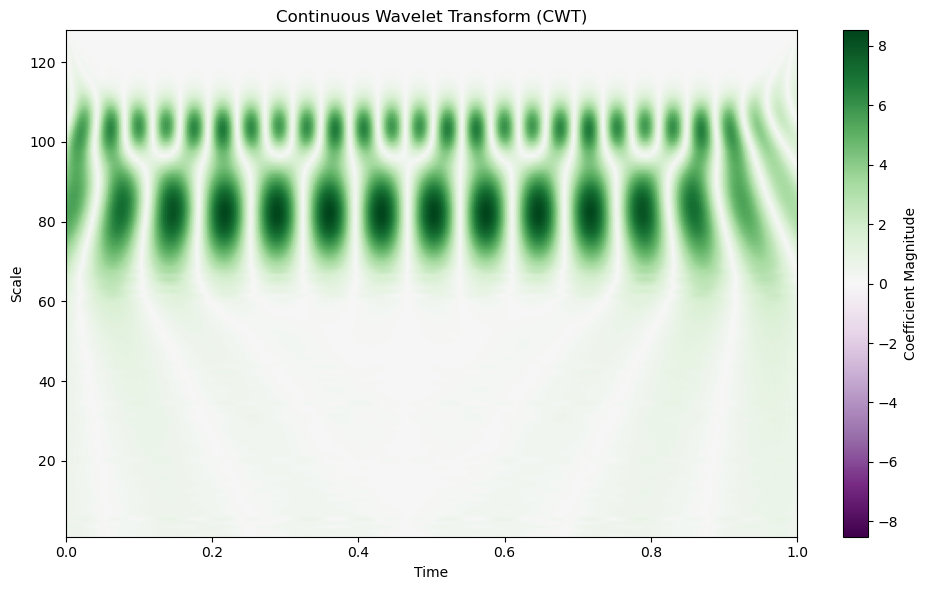

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 生成一个信号（包含两个频率分量）
t = np.linspace(0, 1, 400, endpoint=False)
signal = np.cos(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 13 * t)

# 定义母小波
wavelet = 'morl'  # Morlet 小波

# 进行连续小波变换
scales = np.arange(1, 128)  # 尺度
coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

# 绘制结果
plt.figure(figsize=(10, 6))

# 绘制小波系数的幅度图
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())

plt.title('Continuous Wavelet Transform (CWT)')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.colorbar(label='Coefficient Magnitude')

plt.tight_layout()
plt.show()


In [9]:
np.abs(coefficients)

array([[0.02474115, 0.10096385, 0.01014493, ..., 0.00586432, 0.00197749,
        0.1235462 ],
       [0.01353985, 0.16383268, 0.15081776, ..., 0.06947586, 0.16181744,
        0.15349117],
       [0.03905985, 0.30532383, 0.0125774 , ..., 0.19878357, 0.05076243,
        0.31035419],
       ...,
       [0.66359865, 0.736733  , 0.64670489, ..., 0.4733446 , 0.52820208,
        0.42282433],
       [0.46009336, 0.54007733, 0.46179518, ..., 0.43590803, 0.49382843,
        0.3942341 ],
       [0.46974479, 0.55238693, 0.47808968, ..., 0.46548685, 0.51323346,
        0.40439409]])

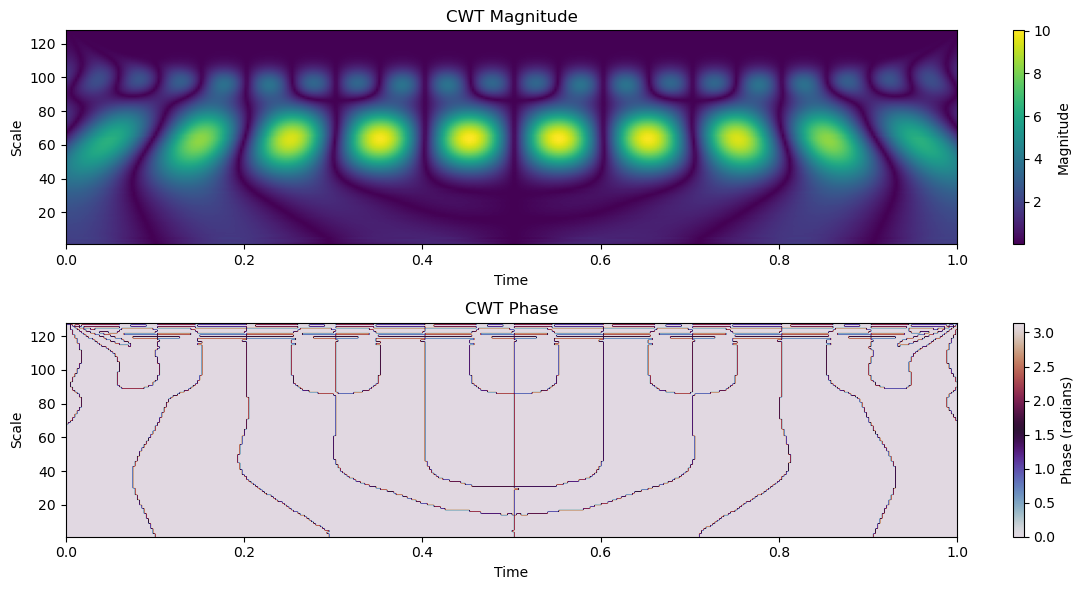

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 生成一个信号（例如：包含两个频率成分的正弦波）
t = np.linspace(0, 1, 400, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)

# 使用 Morlet 小波进行连续小波变换
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, 'morl')

# 1. 提取幅度信息
magnitude = np.abs(coefficients)  # 获取幅度

# 2. 提取相位信息
phase = np.angle(coefficients)  # 获取相位

# 3. 绘制幅度图
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.imshow(magnitude, extent=[0, 1, 1, 128], cmap='viridis', aspect='auto')
plt.title('CWT Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.colorbar(label='Magnitude')

# 4. 绘制相位图
plt.subplot(2, 1, 2)
plt.imshow(phase, extent=[0, 1, 1, 128], cmap='twilight', aspect='auto')
plt.title('CWT Phase')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.colorbar(label='Phase (radians)')

plt.tight_layout()
plt.show()


In [14]:
np.angle(0.019)

0.0

In [20]:
np.angle(coefficients[0][2])

3.141592653589793

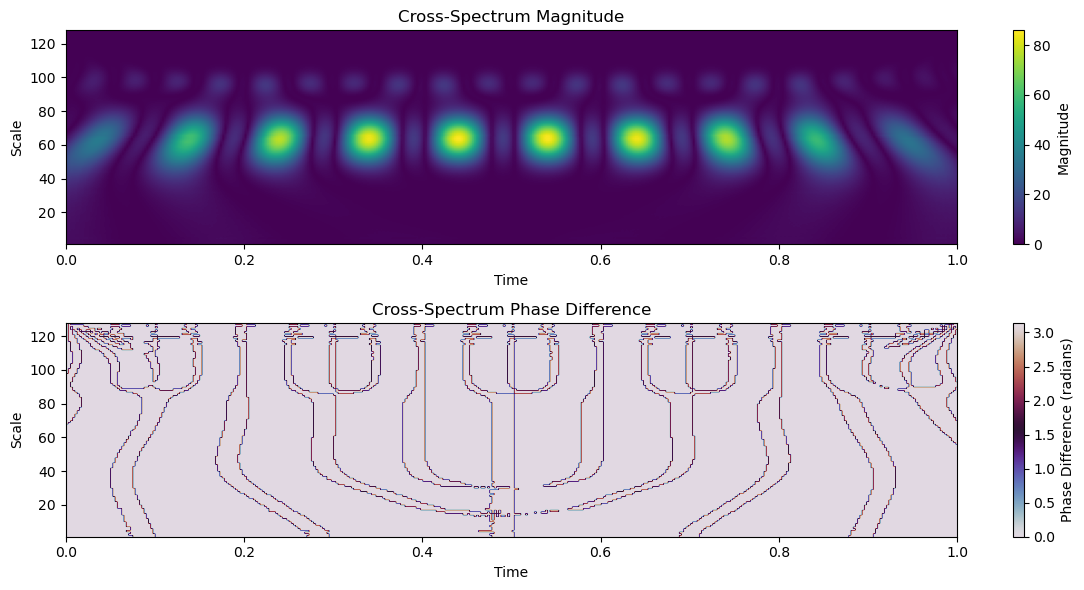

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 生成两个信号
t = np.linspace(0, 1, 400, endpoint=False)  # 时间向量
signal1 = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)
signal2 = np.sin(2 * np.pi * 5 * t + np.pi/4) + 0.5 * np.sin(2 * np.pi * 10 * t + np.pi/6)

# 使用 Morlet 小波对两个信号进行 CWT
scales = np.arange(1, 128)  # 尺度范围
coeffs1, _ = pywt.cwt(signal1, scales, 'morl')
coeffs2, _ = pywt.cwt(signal2, scales, 'morl')

# 计算互谱：一个信号的 CWT 系数乘以另一个信号 CWT 系数的复共轭
cross_spectrum = coeffs1 * np.conj(coeffs2)

# 提取模（幅度）
magnitude = np.abs(cross_spectrum)

# 提取相位差
phase_diff = np.angle(cross_spectrum)

# 绘制互谱的模和相位差
plt.figure(figsize=(12, 6))

# 1. 绘制模（幅度）图
plt.subplot(2, 1, 1)
plt.imshow(magnitude, extent=[0, 1, 1, 128], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Cross-Spectrum Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')

# 2. 绘制相位差图
plt.subplot(2, 1, 2)
plt.imshow(phase_diff, extent=[0, 1, 1, 128], cmap='twilight', aspect='auto')
plt.colorbar(label='Phase Difference (radians)')
plt.title('Cross-Spectrum Phase Difference')
plt.xlabel('Time')
plt.ylabel('Scale')

plt.tight_layout()
plt.show()


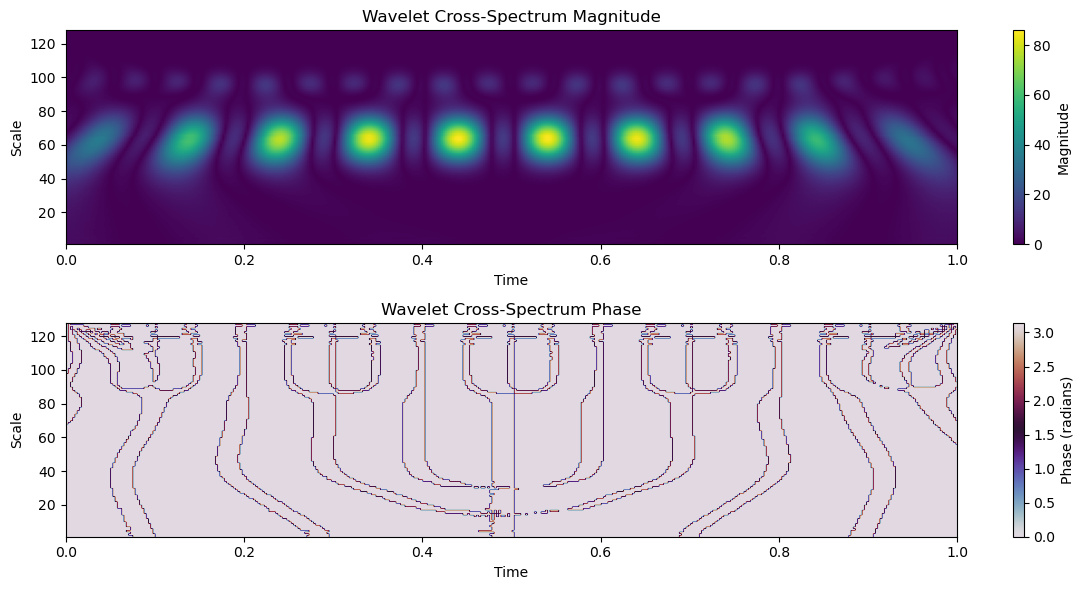

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 生成两个不同的信号
t = np.linspace(0, 1, 400, endpoint=False)  # 时间向量
signal1 = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 10 * t)
signal2 = np.sin(2 * np.pi * 5 * t + np.pi / 4) + 0.5 * np.sin(2 * np.pi * 10 * t + np.pi / 6)

# 定义母小波
wavelet = 'morl'  # 使用 Morlet 小波

# 对两个信号分别进行连续小波变换
scales = np.arange(1, 128)  # 尺度
coeffs1, freqs1 = pywt.cwt(signal1, scales, wavelet)
coeffs2, freqs2 = pywt.cwt(signal2, scales, wavelet)

# 计算小波互谱
cross_spectrum = coeffs1 * np.conj(coeffs2)

# 计算互谱的幅度和相位
cross_spectrum_magnitude = np.abs(cross_spectrum)  # 幅度
cross_spectrum_phase = np.angle(cross_spectrum)    # 相位

# 绘制小波互谱的幅度图和相位图
plt.figure(figsize=(12, 6))

# 绘制互谱幅度图
plt.subplot(2, 1, 1)
plt.imshow(cross_spectrum_magnitude, extent=[0, 1, 1, 128], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Cross-Spectrum Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')

# 绘制互谱相位图
plt.subplot(2, 1, 2)
plt.imshow(cross_spectrum_phase, extent=[0, 1, 1, 128], cmap='twilight', aspect='auto')
plt.colorbar(label='Phase (radians)')
plt.title('Wavelet Cross-Spectrum Phase')
plt.xlabel('Time')
plt.ylabel('Scale')

plt.tight_layout()
plt.show()


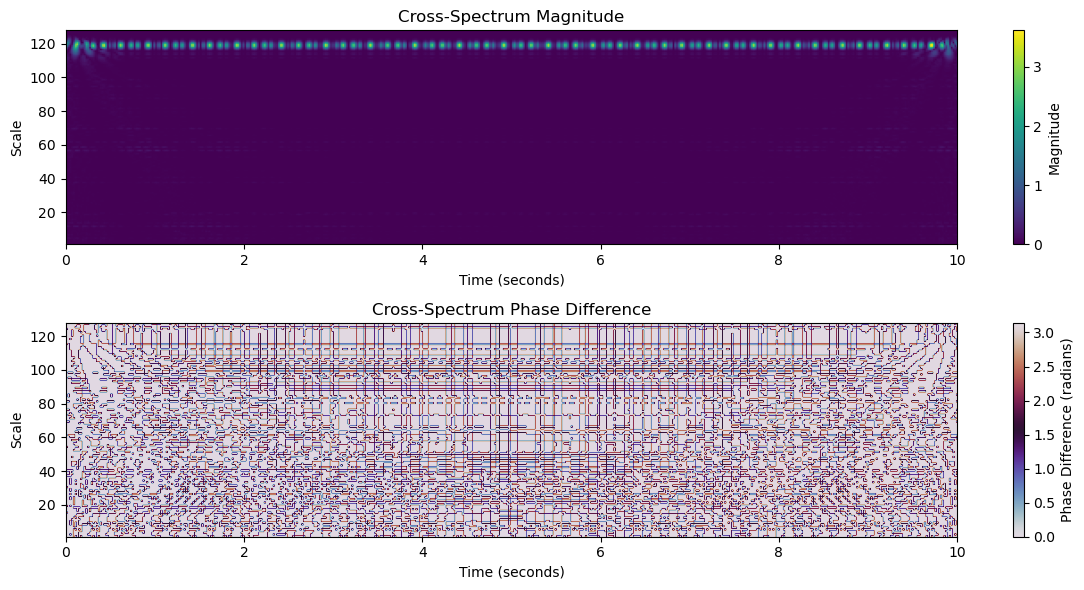

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal

# 假设你的电场和磁场信号如下（示例数据）
t_e = np.linspace(0, 10, 160)  # 电场信号，16 Hz 采样率，持续 10 秒
electric_field_signal = np.sin(2 * np.pi * 3 * t_e)  # 电场信号

t_m = np.linspace(0, 10, 500)  # 磁场信号，50 Hz 采样率，持续 10 秒
magnetic_field_signal = np.cos(2 * np.pi * 5 * t_m)  # 磁场信号

# 1. 重采样电场信号到 50 Hz 采样率（与磁场信号匹配）
electric_field_resampled = signal.resample(electric_field_signal, 500)

# 2. 设置尺度范围和使用 Morlet 小波
scales = np.arange(1, 128)  # 设定尺度范围
wavelet = 'morl'  # 使用 Morlet 小波

# 3. 对重采样后的电场信号和磁场信号进行 CWT
coeffs_e, _ = pywt.cwt(electric_field_resampled, scales, wavelet, sampling_period=1/50)
coeffs_m, _ = pywt.cwt(magnetic_field_signal, scales, wavelet, sampling_period=1/50)

# 4. 计算互谱的模和相位差
cross_spectrum = coeffs_e * np.conj(coeffs_m)
magnitude = np.abs(cross_spectrum)  # 互谱的模
phase_diff = np.angle(cross_spectrum)  # 互谱的相位差

# 5. 绘制结果
plt.figure(figsize=(12, 6))

# 绘制互谱的模图
plt.subplot(2, 1, 1)
plt.imshow(magnitude, extent=[0, 10, 1, 128], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Cross-Spectrum Magnitude')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale')

# 绘制互谱的相位差图
plt.subplot(2, 1, 2)
plt.imshow(phase_diff, extent=[0, 10, 1, 128], cmap='twilight', aspect='auto')
plt.colorbar(label='Phase Difference (radians)')
plt.title('Cross-Spectrum Phase Difference')
plt.xlabel('Time (seconds)')
plt.ylabel('Scale')

plt.tight_layout()
plt.show()


In [7]:
import pywt
import numpy as np

# 示例信号
t = np.linspace(0, 1, 500, endpoint=False)
signal1 = np.sin(2 * np.pi * 5 * t)
signal2 = np.cos(2 * np.pi * 5 * t)

# 使用 Morlet 小波进行 CWT
scales = np.arange(1, 100)
coeffs1, _ = pywt.cwt(signal1, scales, 'morl')
coeffs2, _ = pywt.cwt(signal2, scales, 'morl')

# 计算互谱 (包含复共轭)
cross_spectrum = coeffs1 * np.conj(coeffs2)

# 结果是信号的互谱
print("Cross-spectrum: ", cross_spectrum)


Cross-spectrum:  [[-2.01361044e-06 -9.74189872e-04 -3.87025117e-07 ...  1.85827803e-07
  -1.48981745e-06  9.38538660e-06]
 [ 5.04089682e-07 -7.11021023e-04 -1.23271816e-03 ... -4.55489541e-05
  -6.71144427e-04 -1.25272890e-03]
 [ 5.33960774e-06 -3.85867043e-03 -2.14916662e-04 ... -9.49518415e-04
   1.93600957e-04 -3.53807508e-03]
 ...
 [ 1.40748225e+01  1.43882136e+01  1.38963202e+01 ... -1.30213407e+01
  -1.31852744e+01 -1.38963212e+01]
 [ 1.34875108e+01  1.36819597e+01  1.30636075e+01 ... -1.19832214e+01
  -1.22392358e+01 -1.30636090e+01]
 [ 1.28219914e+01  1.29234733e+01  1.22111214e+01 ... -1.09113382e+01
  -1.12361333e+01 -1.21467645e+01]]


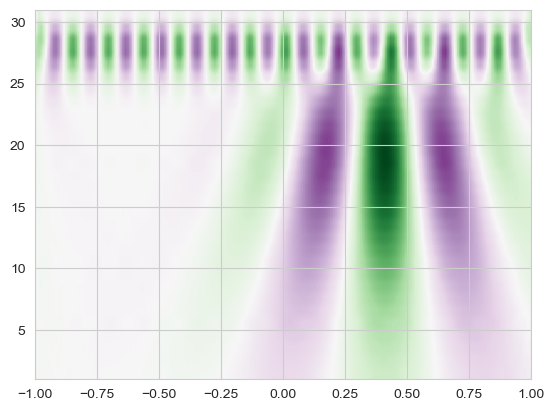

In [25]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

Real part of CWT coefficients:
 [[ 7.89565005e-03  7.86405646e-03  7.01243713e-05 ...  2.17354194e-04
   2.70608291e-04 -7.56150698e-05]
 [-4.02357672e-03 -4.02350376e-03  7.08058030e-03 ... -6.37158844e-04
   3.85284175e-03 -7.09253365e-03]
 [-1.12525998e-02 -1.12601908e-02  1.02792413e-02 ...  4.44174219e-03
  -8.98985351e-03 -1.03243391e-02]
 ...
 [ 2.76070078e+00  2.76830483e+00  2.77595310e+00 ... -2.76929578e+00
  -2.77264595e+00 -2.77595310e+00]
 [ 2.74115778e+00  2.74981547e+00  2.75863335e+00 ... -2.75437885e+00
  -2.75639400e+00 -2.75847294e+00]
 [ 2.62887684e+00  2.63459176e+00  2.64096431e+00 ... -2.63344176e+00
  -2.63691419e+00 -2.64096431e+00]]
Imaginary part of CWT coefficients:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


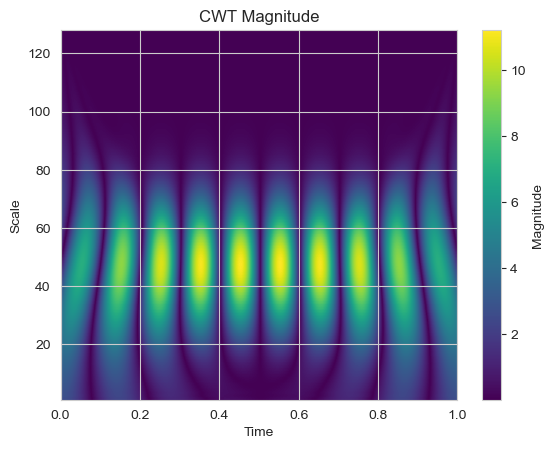

In [24]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 生成一个实数信号
t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t)

# 对信号进行 CWT
scales = np.arange(1, 128)
coefficients, _ = pywt.cwt(signal, scales, 'morl')

# 提取实部、虚部、幅度和相位
real_part = np.real(coefficients)
imag_part = np.imag(coefficients)
magnitude = np.abs(coefficients)
phase = np.angle(coefficients)

# 输出系数的实部和虚部
print("Real part of CWT coefficients:\n", real_part)
print("Imaginary part of CWT coefficients:\n", imag_part)

# 绘制幅度图
plt.imshow(magnitude, extent=[0, 1, 1, 128], cmap='viridis', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('CWT Magnitude')
plt.xlabel('Time')
plt.ylabel('Scale')
plt.show()
